In [1]:
from scipy.fft import fft2, ifft2, fftshift, ifftshift
import seaborn as sns
import matplotlib.pyplot as plt
import os
import pandas as pd
import skrf as rf
import numpy as np
import re
from PIL import Image
import GSx
import DammannY as dt
import DfGen
from tqdm import tqdm

In [2]:
#Parâmetros
wavelength = 1064e-9  # 1064 nm
z = 380e-6           # 380 μm
dx = 520e-9          # pixel pitch
NA = 0.65            # Abertura numérica
num_iter = 60


#Geração mapa de fase polarização x
print("Gerando mapa de fase para Polarização X (Holograma)")
target_image = GSx.load_and_preprocess_image('ufabc.png', target_size=(450, 450))
phase_map_x, _ = GSx.gerchberg_saxton_angular_spectrum(
    target_image, wavelength, z, dx, NA, num_iter)

print("Mapa de fase X gerado\n")

#Geração mapa de fase polarização y
print("Gerando mapa de fase para Polarização Y (Dammann)")
phase_map_y, metrics_y, _ = dt.generate_dammann_phase_map(
    P=dx,
    wavelength=wavelength,
    supercell_pixels=45,
    n_supercells=10,
    iters_gs=400)

print("Mapa de fase Y gerado")
print("\nDimensões dos mapas de fase:")
print(f"Mapa X: {phase_map_x.shape}")
print(f"Mapa Y: {phase_map_y.shape}")


Gerando mapa de fase para Polarização X (Holograma)
Iteração 10/60, Correlação: 0.9471
Iteração 20/60, Correlação: 0.9542
Iteração 30/60, Correlação: 0.9569
Iteração 40/60, Correlação: 0.9583
Iteração 50/60, Correlação: 0.9592
Iteração 60/60, Correlação: 0.9599
Mapa de fase X gerado

Gerando mapa de fase para Polarização Y (Dammann)
---- Resumo Dammann ----
Supercell: 45x45, metasurface: 450x450
Iterações GS: 400
Ordens propagantes M = 1513
DE ≈ 0.999026
RMSE uniformidade = 0.070873
Mapa de fase Y gerado

Dimensões dos mapas de fase:
Mapa X: (450, 450)
Mapa Y: (450, 450)


In [3]:
# 1. Defina o caminho para a pasta com os arquivos .ts
#    (Pode ser este ou qualquer outro caminho)
caminho_dos_dados = r"C:\Users\caval_5gfl5hy\OneDrive\Área de Trabalho\Altura_Varia"

# 2. Chame a função find_file de dentro do seu módulo DfGen
print("Iniciando a leitura dos arquivos...")
df_completo = DfGen.find_file(caminho_dos_dados)

# 3. Verifique o resultado
if df_completo is not None:
    print("\n--- DataFrame carregado com sucesso! ---")
    print(df_completo.info())
    
    # Agora você pode analisar as colunas, incluindo a 'H'
    print("\nValores únicos de altura (H) encontrados:")
    print(df_completo['H'].unique())
else:
    print("\nNenhum DataFrame foi gerado. Verifique a pasta.")

Iniciando a leitura dos arquivos...
Buscando...
Lendo arquivo: Teste_Nanopilar_1.ts (ID:1)...
Lendo arquivo: Teste_Nanopilar_10.ts (ID:10)...
Lendo arquivo: Teste_Nanopilar_100.ts (ID:100)...
Lendo arquivo: Teste_Nanopilar_1000.ts (ID:1000)...
Lendo arquivo: Teste_Nanopilar_1001.ts (ID:1001)...
Lendo arquivo: Teste_Nanopilar_1002.ts (ID:1002)...
Lendo arquivo: Teste_Nanopilar_1003.ts (ID:1003)...
Lendo arquivo: Teste_Nanopilar_1004.ts (ID:1004)...
Lendo arquivo: Teste_Nanopilar_1005.ts (ID:1005)...
Lendo arquivo: Teste_Nanopilar_1006.ts (ID:1006)...
Lendo arquivo: Teste_Nanopilar_1007.ts (ID:1007)...
Lendo arquivo: Teste_Nanopilar_1008.ts (ID:1008)...
Lendo arquivo: Teste_Nanopilar_1009.ts (ID:1009)...
Lendo arquivo: Teste_Nanopilar_101.ts (ID:101)...
Lendo arquivo: Teste_Nanopilar_1010.ts (ID:1010)...
Lendo arquivo: Teste_Nanopilar_1011.ts (ID:1011)...
Lendo arquivo: Teste_Nanopilar_1012.ts (ID:1012)...
Lendo arquivo: Teste_Nanopilar_1013.ts (ID:1013)...
Lendo arquivo: Teste_Nanopilar

Lendo arquivo: Teste_Nanopilar_115.ts (ID:115)...
Lendo arquivo: Teste_Nanopilar_1150.ts (ID:1150)...
Lendo arquivo: Teste_Nanopilar_1151.ts (ID:1151)...
Lendo arquivo: Teste_Nanopilar_1152.ts (ID:1152)...
Lendo arquivo: Teste_Nanopilar_1153.ts (ID:1153)...
Lendo arquivo: Teste_Nanopilar_1154.ts (ID:1154)...
Lendo arquivo: Teste_Nanopilar_1155.ts (ID:1155)...
Lendo arquivo: Teste_Nanopilar_1156.ts (ID:1156)...
Lendo arquivo: Teste_Nanopilar_1157.ts (ID:1157)...
Lendo arquivo: Teste_Nanopilar_1158.ts (ID:1158)...
Lendo arquivo: Teste_Nanopilar_1159.ts (ID:1159)...
Lendo arquivo: Teste_Nanopilar_116.ts (ID:116)...
Lendo arquivo: Teste_Nanopilar_1160.ts (ID:1160)...
Lendo arquivo: Teste_Nanopilar_1161.ts (ID:1161)...
Lendo arquivo: Teste_Nanopilar_1162.ts (ID:1162)...
Lendo arquivo: Teste_Nanopilar_1163.ts (ID:1163)...
Lendo arquivo: Teste_Nanopilar_1164.ts (ID:1164)...
Lendo arquivo: Teste_Nanopilar_1165.ts (ID:1165)...
Lendo arquivo: Teste_Nanopilar_1166.ts (ID:1166)...
Lendo arquivo: T

Lendo arquivo: Teste_Nanopilar_244.ts (ID:244)...
Lendo arquivo: Teste_Nanopilar_245.ts (ID:245)...
Lendo arquivo: Teste_Nanopilar_246.ts (ID:246)...
Lendo arquivo: Teste_Nanopilar_247.ts (ID:247)...
Lendo arquivo: Teste_Nanopilar_248.ts (ID:248)...
Lendo arquivo: Teste_Nanopilar_249.ts (ID:249)...
Lendo arquivo: Teste_Nanopilar_25.ts (ID:25)...
Lendo arquivo: Teste_Nanopilar_250.ts (ID:250)...
Lendo arquivo: Teste_Nanopilar_251.ts (ID:251)...
Lendo arquivo: Teste_Nanopilar_252.ts (ID:252)...
Lendo arquivo: Teste_Nanopilar_253.ts (ID:253)...
Lendo arquivo: Teste_Nanopilar_254.ts (ID:254)...
Lendo arquivo: Teste_Nanopilar_255.ts (ID:255)...
Lendo arquivo: Teste_Nanopilar_256.ts (ID:256)...
Lendo arquivo: Teste_Nanopilar_257.ts (ID:257)...
Lendo arquivo: Teste_Nanopilar_258.ts (ID:258)...
Lendo arquivo: Teste_Nanopilar_259.ts (ID:259)...
Lendo arquivo: Teste_Nanopilar_26.ts (ID:26)...
Lendo arquivo: Teste_Nanopilar_260.ts (ID:260)...
Lendo arquivo: Teste_Nanopilar_261.ts (ID:261)...
Lend

Lendo arquivo: Teste_Nanopilar_397.ts (ID:397)...
Lendo arquivo: Teste_Nanopilar_398.ts (ID:398)...
Lendo arquivo: Teste_Nanopilar_399.ts (ID:399)...
Lendo arquivo: Teste_Nanopilar_4.ts (ID:4)...
Lendo arquivo: Teste_Nanopilar_40.ts (ID:40)...
Lendo arquivo: Teste_Nanopilar_400.ts (ID:400)...
Lendo arquivo: Teste_Nanopilar_401.ts (ID:401)...
Lendo arquivo: Teste_Nanopilar_402.ts (ID:402)...
Lendo arquivo: Teste_Nanopilar_403.ts (ID:403)...
Lendo arquivo: Teste_Nanopilar_404.ts (ID:404)...
Lendo arquivo: Teste_Nanopilar_405.ts (ID:405)...
Lendo arquivo: Teste_Nanopilar_406.ts (ID:406)...
Lendo arquivo: Teste_Nanopilar_407.ts (ID:407)...
Lendo arquivo: Teste_Nanopilar_408.ts (ID:408)...
Lendo arquivo: Teste_Nanopilar_409.ts (ID:409)...
Lendo arquivo: Teste_Nanopilar_41.ts (ID:41)...
Lendo arquivo: Teste_Nanopilar_410.ts (ID:410)...
Lendo arquivo: Teste_Nanopilar_411.ts (ID:411)...
Lendo arquivo: Teste_Nanopilar_412.ts (ID:412)...
Lendo arquivo: Teste_Nanopilar_413.ts (ID:413)...
Lendo ar

Lendo arquivo: Teste_Nanopilar_547.ts (ID:547)...
Lendo arquivo: Teste_Nanopilar_548.ts (ID:548)...
Lendo arquivo: Teste_Nanopilar_549.ts (ID:549)...
Lendo arquivo: Teste_Nanopilar_55.ts (ID:55)...
Lendo arquivo: Teste_Nanopilar_550.ts (ID:550)...
Lendo arquivo: Teste_Nanopilar_551.ts (ID:551)...
Lendo arquivo: Teste_Nanopilar_552.ts (ID:552)...
Lendo arquivo: Teste_Nanopilar_553.ts (ID:553)...
Lendo arquivo: Teste_Nanopilar_554.ts (ID:554)...
Lendo arquivo: Teste_Nanopilar_555.ts (ID:555)...
Lendo arquivo: Teste_Nanopilar_556.ts (ID:556)...
Lendo arquivo: Teste_Nanopilar_557.ts (ID:557)...
Lendo arquivo: Teste_Nanopilar_558.ts (ID:558)...
Lendo arquivo: Teste_Nanopilar_559.ts (ID:559)...
Lendo arquivo: Teste_Nanopilar_56.ts (ID:56)...
Lendo arquivo: Teste_Nanopilar_560.ts (ID:560)...
Lendo arquivo: Teste_Nanopilar_561.ts (ID:561)...
Lendo arquivo: Teste_Nanopilar_562.ts (ID:562)...
Lendo arquivo: Teste_Nanopilar_563.ts (ID:563)...
Lendo arquivo: Teste_Nanopilar_564.ts (ID:564)...
Lend

Lendo arquivo: Teste_Nanopilar_697.ts (ID:697)...
Lendo arquivo: Teste_Nanopilar_698.ts (ID:698)...
Lendo arquivo: Teste_Nanopilar_699.ts (ID:699)...
Lendo arquivo: Teste_Nanopilar_7.ts (ID:7)...
Lendo arquivo: Teste_Nanopilar_70.ts (ID:70)...
Lendo arquivo: Teste_Nanopilar_700.ts (ID:700)...
Lendo arquivo: Teste_Nanopilar_701.ts (ID:701)...
Lendo arquivo: Teste_Nanopilar_702.ts (ID:702)...
Lendo arquivo: Teste_Nanopilar_703.ts (ID:703)...
Lendo arquivo: Teste_Nanopilar_704.ts (ID:704)...
Lendo arquivo: Teste_Nanopilar_705.ts (ID:705)...
Lendo arquivo: Teste_Nanopilar_706.ts (ID:706)...
Lendo arquivo: Teste_Nanopilar_707.ts (ID:707)...
Lendo arquivo: Teste_Nanopilar_708.ts (ID:708)...
Lendo arquivo: Teste_Nanopilar_709.ts (ID:709)...
Lendo arquivo: Teste_Nanopilar_71.ts (ID:71)...
Lendo arquivo: Teste_Nanopilar_710.ts (ID:710)...
Lendo arquivo: Teste_Nanopilar_711.ts (ID:711)...
Lendo arquivo: Teste_Nanopilar_712.ts (ID:712)...
Lendo arquivo: Teste_Nanopilar_713.ts (ID:713)...
Lendo ar

Lendo arquivo: Teste_Nanopilar_846.ts (ID:846)...
Lendo arquivo: Teste_Nanopilar_847.ts (ID:847)...
Lendo arquivo: Teste_Nanopilar_848.ts (ID:848)...
Lendo arquivo: Teste_Nanopilar_849.ts (ID:849)...
Lendo arquivo: Teste_Nanopilar_85.ts (ID:85)...
Lendo arquivo: Teste_Nanopilar_850.ts (ID:850)...
Lendo arquivo: Teste_Nanopilar_851.ts (ID:851)...
Lendo arquivo: Teste_Nanopilar_852.ts (ID:852)...
Lendo arquivo: Teste_Nanopilar_853.ts (ID:853)...
Lendo arquivo: Teste_Nanopilar_854.ts (ID:854)...
Lendo arquivo: Teste_Nanopilar_855.ts (ID:855)...
Lendo arquivo: Teste_Nanopilar_856.ts (ID:856)...
Lendo arquivo: Teste_Nanopilar_857.ts (ID:857)...
Lendo arquivo: Teste_Nanopilar_858.ts (ID:858)...
Lendo arquivo: Teste_Nanopilar_859.ts (ID:859)...
Lendo arquivo: Teste_Nanopilar_86.ts (ID:86)...
Lendo arquivo: Teste_Nanopilar_860.ts (ID:860)...
Lendo arquivo: Teste_Nanopilar_861.ts (ID:861)...
Lendo arquivo: Teste_Nanopilar_862.ts (ID:862)...
Lendo arquivo: Teste_Nanopilar_863.ts (ID:863)...
Lend

Lendo arquivo: Teste_Nanopilar_995.ts (ID:995)...
Lendo arquivo: Teste_Nanopilar_996.ts (ID:996)...
Lendo arquivo: Teste_Nanopilar_997.ts (ID:997)...
Lendo arquivo: Teste_Nanopilar_998.ts (ID:998)...
Lendo arquivo: Teste_Nanopilar_999.ts (ID:999)...

--- DataFrame carregado com sucesso! ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2350 entries, 0 to 2349
Data columns (total 51 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   arquivo         2350 non-null   object 
 1   caminho         2350 non-null   object 
 2   id_nanopilar    2350 non-null   int64  
 3   frequencia_hz   2350 non-null   float64
 4   frequencia_ghz  2350 non-null   float64
 5   nports          2350 non-null   int64  
 6   H               2350 non-null   float64
 7   L_x             2350 non-null   float64
 8   L_y             2350 non-null   float64
 9   Lambda          2350 non-null   float64
 10  Max_L           2350 non-null   float64
 11  Min_L      

In [23]:
df_filt1064nm = df_completo.query('frequencia_ghz == 281750.0') # 281760.0 frequencia padrão


In [24]:
cols1 = [
    'id_nanopilar', 
    'L_x', 
    'L_y', 
    'H',
    'frequencia_ghz',
    'S13_real', 
    'S13_imag', 
    'S24_real', 
    'S24_imag'
]
df2 = df_filt1064nm[cols1].copy()
df2

,id_nanopilar,L_x,L_y,H,frequencia_ghz,S13_real,S13_imag,S24_real,S24_imag
0,1,200.0,200.0,600.0,281750.0,0.171189,-0.963057,0.173290,-0.963099
2,2,70.0,70.0,100.0,281750.0,-0.327128,0.910280,-0.327227,0.910035
4,3,70.0,80.0,100.0,281750.0,-0.313648,0.918864,-0.321188,0.914053
6,4,70.0,90.0,100.0,281750.0,-0.300805,0.926543,-0.317657,0.916310
8,5,70.0,70.0,200.0,281750.0,0.287368,0.926983,0.287285,0.926937
...,...,...,...,...,...,...,...,...,...
2340,1171,200.0,200.0,100.0,281750.0,0.365187,0.844865,0.366130,0.844069
2342,1172,200.0,200.0,200.0,281750.0,0.346841,-0.686642,0.345037,-0.686698
2344,1173,200.0,200.0,300.0,281750.0,-0.256467,0.416412,-0.254977,0.412712
2346,1174,200.0,200.0,400.0,281750.0,0.374179,0.217035,0.371398,0.216784


In [33]:
df2['S_complex_TE'] = df2['S13_real'] + 1j * df2['S13_imag']
df2['S_complex_TM'] = df2['S24_real'] + 1j * df2['S24_imag']

cols2 = ['S13_real', 
    'S13_imag', 
    'S24_real', 
    'S24_imag']
df3 = df2.drop(columns = cols2).copy()
df3.to_csv('df3.csv', index=False)

In [34]:
print("Carregando a biblioteca de meta-átomos...")
df3 = pd.read_csv('df3.csv')
df3

Carregando a biblioteca de meta-átomos...


,id_nanopilar,L_x,L_y,H,frequencia_ghz,S_complex_TE,S_complex_TM
0,1,200.0,200.0,600.0,281750.0,(0.171189-0.963057j),(0.17329-0.963099j)
1,2,70.0,70.0,100.0,281750.0,(-0.327128+0.91028j),(-0.327227+0.910035j)
2,3,70.0,80.0,100.0,281750.0,(-0.313648+0.918864j),(-0.321188+0.914053j)
3,4,70.0,90.0,100.0,281750.0,(-0.300805+0.926543j),(-0.317657+0.91631j)
4,5,70.0,70.0,200.0,281750.0,(0.287368+0.926983j),(0.287285+0.926937j)
...,...,...,...,...,...,...,...
1170,1171,200.0,200.0,100.0,281750.0,(0.365187+0.844865j),(0.36613+0.844069j)
1171,1172,200.0,200.0,200.0,281750.0,(0.346841-0.686642j),(0.345037-0.686698j)
1172,1173,200.0,200.0,300.0,281750.0,(-0.256467+0.416412j),(-0.254977+0.412712j)
1173,1174,200.0,200.0,400.0,281750.0,(0.374179+0.217035j),(0.371398+0.216784j)


In [35]:
def perform_phase_matching(library_df, target_phase_tm, target_phase_te):
    """
    Executa o algoritmo de casamento de fase para construir a metassuperfície.
    """
    # Extrai os dados da biblioteca em arrays para maior velocidade de processamento
    lib_lx = library_df['L_x'].to_numpy()
    lib_ly = library_df['L_y'].to_numpy()
    
    # Mesmo processo anterior, porém converte complexos de strings para números
    lib_S_complex_tm = library_df['S_complex_TM'].to_numpy(dtype=np.complex128)
    lib_S_complex_te = library_df['S_complex_TE'].to_numpy(dtype=np.complex128)
    
    altura, largura = target_phase_tm.shape
    
    # Matrizes para guardar o layout físico e o erro
    layout_lx = np.zeros_like(target_phase_tm, dtype=int)
    layout_ly = np.zeros_like(target_phase_tm, dtype=int)
    error_map = np.zeros_like(target_phase_tm, dtype=float)
    
   
    print("\nIniciando busca pelo melhor meta-átomo para cada pixel...")
    for i in tqdm(range(altura), desc="Progresso do Phase Matching"):
        for j in range(largura):
            #Alvos complexos para o pixel (i, j)
            target_tm = np.exp(1j * target_phase_tm[i, j])
            target_te = np.exp(1j * target_phase_te[i, j])
            
            # Calcula o erro quadrático para a biblioteca de uma vez
            error_tm = np.abs(lib_S_complex_tm - target_tm)**2
            error_te = np.abs(lib_S_complex_te - target_te)**2
            total_error = error_tm + error_te
            
            # Encontra o índice do meta-átomo com o menor erro
            best_idx = np.argmin(total_error)
            
            # Armazena a geometria (Lx, Ly) e o erro do melhor candidato
            layout_lx[i, j] = lib_lx[best_idx]
            layout_ly[i, j] = lib_ly[best_idx]
            error_map[i, j] = total_error[best_idx]
            
    return layout_lx, layout_ly, np.sqrt(error_map)


In [36]:
layout_final_lx, layout_final_ly, mapa_de_erro_final = perform_phase_matching(
   df5, phase_map_x, phase_map_y)


Iniciando busca pelo melhor meta-átomo para cada pixel...


Progresso do Phase Matching: 100%|███████████████████████████████████████████████████| 450/450 [00:19<00:00, 22.85it/s]


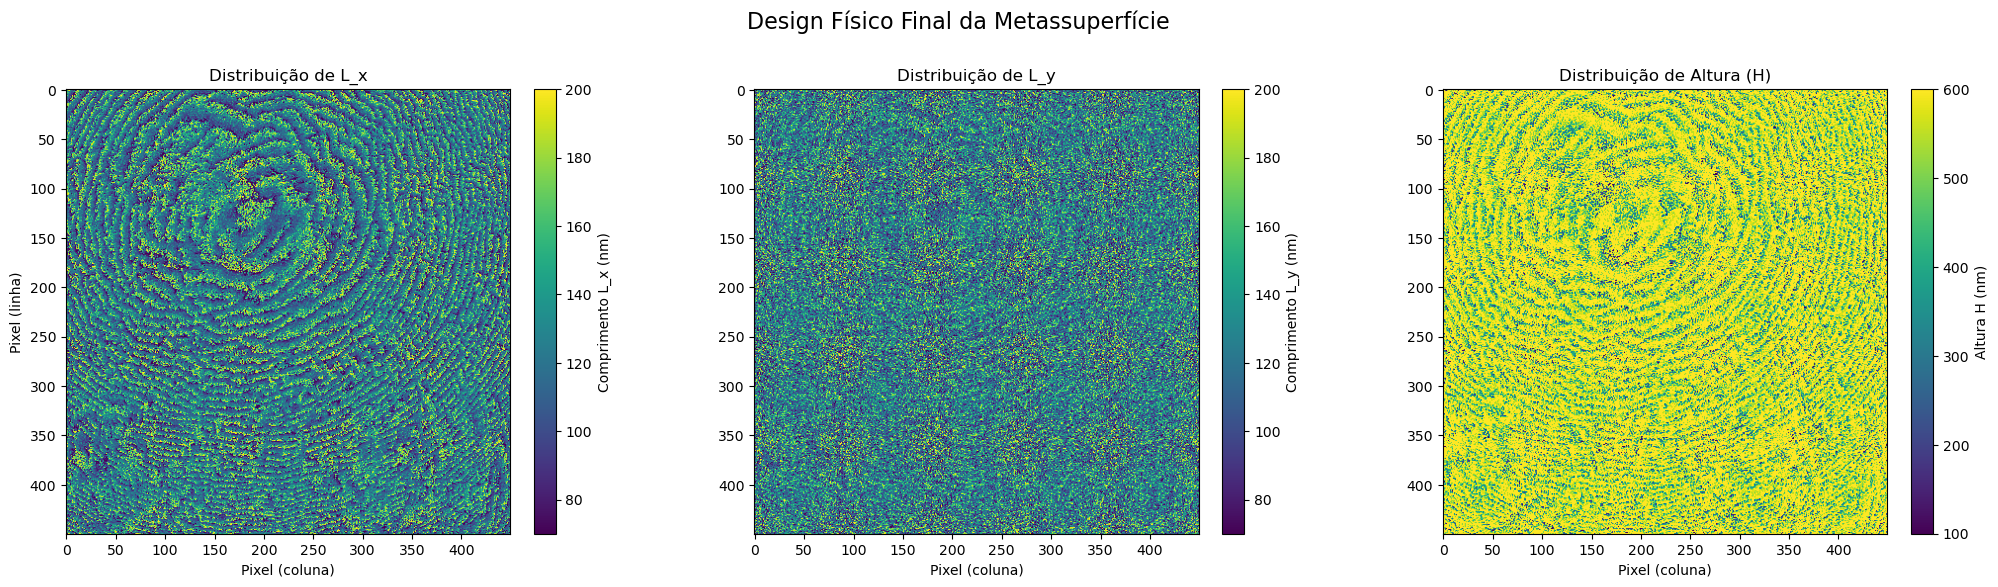

In [37]:
plt.figure(figsize=(14, 6))
plt.suptitle("Design Físico Final da Metassuperfície", fontsize=16)

# Plot do mapa de Lx
plt.subplot(1, 2, 1)
im1 = plt.imshow(layout_final_lx, cmap='viridis')
plt.title("Distribuição de L_x")
plt.xlabel("Pixel (coluna)")
plt.ylabel("Pixel (linha)")
plt.colorbar(im1, label="Comprimento Lx (nm)")

# Plot do mapa de Ly
plt.subplot(1, 2, 2)
im2 = plt.imshow(layout_final_ly, cmap='viridis')
plt.title("Distribuição de L_y")
plt.xlabel("Pixel (coluna)")
plt.colorbar(im2, label="Comprimento Ly (nm)")

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

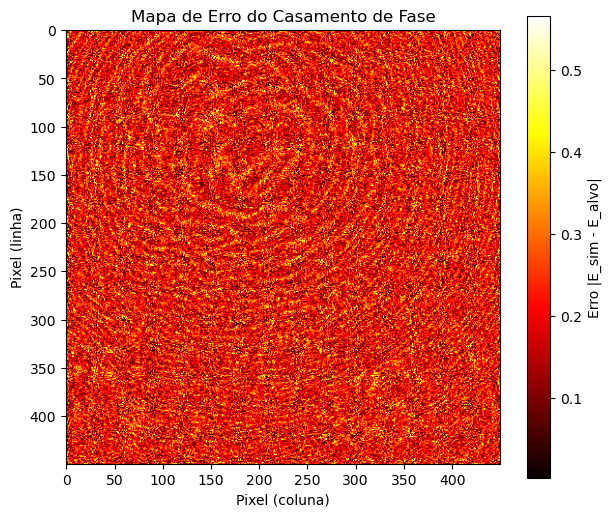

Erro médio final em toda a metassuperfície: 0.2129


In [38]:
plt.figure(figsize=(7, 6))
im_err = plt.imshow(mapa_de_erro_final, cmap='hot')
plt.title("Mapa de Erro do Casamento de Fase")
plt.xlabel("Pixel (coluna)")
plt.ylabel("Pixel (linha)")
plt.colorbar(im_err, label="Erro |E_sim - E_alvo|")
plt.show()

erro_medio = np.mean(mapa_de_erro_final)
print(f"Erro médio final em toda a metassuperfície: {erro_medio:.4f}")

Filtrando a biblioteca principal para a frequência de 281750.0 GHz...
Biblioteca filtrada com 1175 meta-átomos.

Construindo o campo complexo da metassuperfície projetada...
Propagando o campo para reconstruir a imagem final...


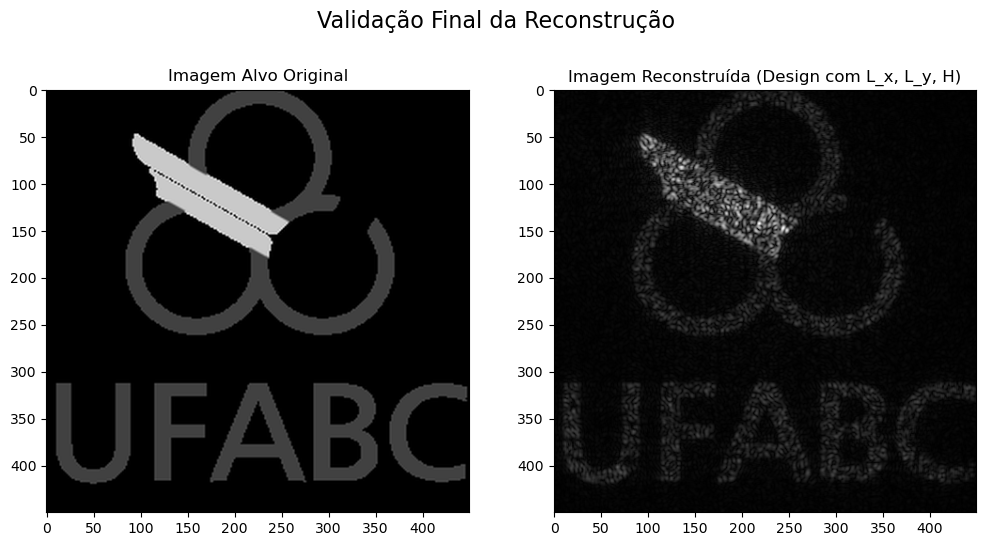

Correlação de Pearson Final: 0.8039


In [39]:
# --- ETAPA DE FILTRAGEM (NOVA) ---
# Coloque aqui a frequência exata (em GHz) que você está usando no seu projeto.
# Tem que ser um valor que existe na coluna 'frequencia_ghz' do seu df3.
freq_alvo_ghz = 281750.0  # <--- EXEMPLO. MUDE PARA A SUA FREQUÊNCIA!

print(f"Filtrando a biblioteca principal para a frequência de {freq_alvo_ghz} GHz...")

# Filtra o df3 para conter APENAS os dados da frequência de interesse
# Usamos np.isclose para evitar problemas com precisão de float
df_freq_unica = df3[np.isclose(df3['frequencia_ghz'], freq_alvo_ghz)]

if df_freq_unica.empty:
    print(f"ERRO: Nenhum dado encontrado para a frequência {freq_alvo_ghz} GHz.")
    print("Verifique os valores únicos na coluna 'frequencia_ghz' do seu df3:")
    print(df3['frequencia_ghz'].unique())
    # Você pode querer parar o script aqui
    # raise ValueError("Frequência alvo não encontrada na biblioteca.")
else:
    print(f"Biblioteca filtrada com {len(df_freq_unica)} meta-átomos.")
# --- FIM DA ETAPA DE FILTRAGEM ---


print("\nConstruindo o campo complexo da metassuperfície projetada...")

# Agora, crie a tabela de consulta (lookup_table) a partir do
# DataFrame JÁ FILTRADO (df_freq_unica)
lookup_table = df_freq_unica.set_index(['L_x', 'L_y', 'H'])['S_complex_TM']

# Verificação de segurança: checa se ainda existem duplicatas
# (Isso não deve acontecer se a sua biblioteca estiver correta)
if lookup_table.index.has_duplicates:
    print("Atenção: Mesmo após filtrar por frequência, seu índice (Lx, Ly, H) tem duplicatas.")
    print("Isso pode indicar um erro na sua biblioteca de dados.")
    # Se isso acontecer, a busca .loc[(...)] ainda pode retornar uma Série.
    # Vamos forçar a pegar o primeiro valor (embora o ideal seja corrigir a biblioteca)
    lookup_table = lookup_table.groupby(level=[0, 1, 2]).first()


# Matriz para preencher com as propriedades ópticas dos layouts finais
final_phase_map = np.zeros_like(layout_final_lx, dtype=np.complex128)

for i in range(layout_final_lx.shape[0]):
    for j in range(layout_final_lx.shape[1]):
        # Pega a geometria física para o pixel (i, j)
        lx = layout_final_lx[i, j]
        ly = layout_final_ly[i, j]
        h = layout_final_h[i, j]  # Pega a altura H
        
        try:
            # Busca o S-parameter usando a chave completa (lx, ly, h)
            # Agora isso deve retornar um ÚNICO valor
            final_phase_map[i, j] = lookup_table.loc[(lx, ly, h)]
        except KeyError:
            print(f"ERRO DE CHAVE: A combinação (Lx={lx}, Ly={ly}, H={h}) não foi encontrada na biblioteca.")
            final_phase_map[i, j] = 0 # Coloca zero para poder continuar


print("Propagando o campo para reconstruir a imagem final...")
# O resto do seu código permanece igual
imagem_reconstruida_final = GSx.reconstruct_image(np.angle(final_phase_map), 
                                                  wavelength, z, dx, NA)

plt.figure(figsize=(12, 6))
plt.suptitle("Validação Final da Reconstrução", fontsize=16)

plt.subplot(1, 2, 1)
plt.imshow(target_image, cmap='gray')
plt.title("Imagem Alvo Original")

plt.subplot(1, 2, 2)
plt.imshow(imagem_reconstruida_final, cmap='gray')
plt.title("Imagem Reconstruída (Design com L_x, L_y, H)")

plt.show()

final_correlation = GSx.calculate_correlation(target_image, imagem_reconstruida_final)
print(f"Correlação de Pearson Final: {final_correlation:.4f}")

Carregando DataFrame 'df3.csv'...
Convertendo colunas de texto para números complexos...
Conversão concluída.

Filtrando a biblioteca para a frequência de 27.0 GHz...
ERRO: Frequência alvo 27.0 GHz não encontrada em 'df3.csv'

Preparando para calcular os mapas de erro...
Calculando os erros para cada pixel...


Calculando Mapas de Erro: 100%|██████████████████████████████████████████████████████| 450/450 [00:23<00:00, 19.46it/s]


Cálculos finalizados.
Gerando os gráficos de erro...


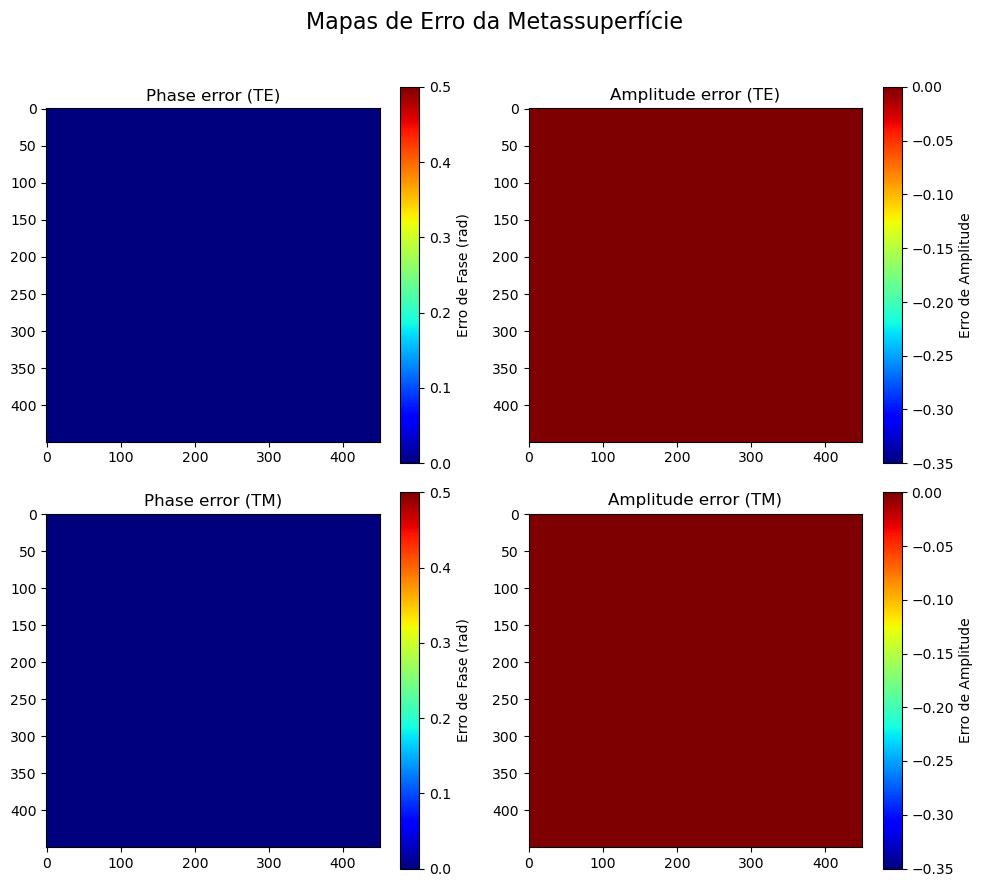


O erro médio de fase absoluto (TM - Holograma) foi: 0.0000 rad
O erro médio de fase absoluto (TE - Dammann) foi: 0.0000 rad
(Valor do artigo para comparação: Erro Fase ~0.094 rad)

O erro médio de amplitude absoluto (TM - Holograma) foi: 0.0000
O erro médio de amplitude absoluto (TE - Dammann) foi: 0.0000
(Valor do artigo para comparação: Erro Amplitude ~0.015 por pixel)


In [41]:


print("Carregando DataFrame 'df3.csv'...")
df3 = pd.read_csv('df3.csv')
print("Convertendo colunas de texto para números complexos...")
df3['S_complex_TE'] = df3['S_complex_TE'].apply(complex)
df3['S_complex_TM'] = df3['S_complex_TM'].apply(complex)
print("Conversão concluída.")

# --- 1. ADICIONAR FILTRO DE FREQUÊNCIA (CRÍTICO) ---
# Coloque aqui a frequência exata (em GHz) que você está usando.
# Deve ser a MESMA frequência usada para o 'perform_phase_matching'.
freq_alvo_ghz = 27.0  # <--- EXEMPLO. MUDE PARA A SUA FREQUÊNCIA!

print(f"\nFiltrando a biblioteca para a frequência de {freq_alvo_ghz} GHz...")
# Filtra o df3 para conter APENAS os dados da frequência de interesse
df_freq_unica = df3[np.isclose(df3['frequencia_ghz'], freq_alvo_ghz)]

if df_freq_unica.empty:
    print(f"ERRO: Frequência alvo {freq_alvo_ghz} GHz não encontrada em 'df3.csv'")
    # Você pode querer parar o script aqui
    # raise ValueError("Frequência alvo não encontrada na biblioteca.")
else:
    print(f"Biblioteca filtrada com {len(df_freq_unica)} meta-átomos.")


print("\nPreparando para calcular os mapas de erro...")

# --- 2. USAR A CHAVE CORRETA (com H) ---
# Crie a lookup table a partir do DataFrame JÁ FILTRADO
# A chave agora precisa incluir L_x, L_y, e H
lookup_table = df_freq_unica.set_index(['L_x', 'L_y', 'H'])

# (Opcional) Vamos selecionar apenas as colunas que queremos para otimizar
lookup_table = lookup_table[['S_complex_TE', 'S_complex_TM']]

# (Opcional) Se houver duplicatas (mesmo (Lx,Ly,H) na mesma freq), remove
if lookup_table.index.has_duplicates:
    print("Atenção: Duplicatas encontradas no índice, pegando o primeiro valor.")
    lookup_table = lookup_table[~lookup_table.index.duplicated(keep='first')]


altura, largura = layout_final_lx.shape

# Crie as 4 matrizes vazias
phase_error_te_map = np.zeros((altura, largura))
amp_error_te_map = np.zeros((altura, largura))
phase_error_tm_map = np.zeros((altura, largura))
amp_error_tm_map = np.zeros((altura, largura))

print("Calculando os erros para cada pixel...")
for i in tqdm(range(altura), desc="Calculando Mapas de Erro"):
    for j in range(largura):
        # --- 3. USAR A CHAVE COMPLETA (Lx, Ly, H) ---
        # Pegue a geometria escolhida para o pixel (i,j)
        lx = layout_final_lx[i, j]
        ly = layout_final_ly[i, j]
        h = layout_final_h[i, j]  # <--- VOCÊ PRECISA USAR A ALTURA H
        
        try:
            # Busca as propriedades ópticas reais do meta-átomo na biblioteca
            # Use a chave completa (lx, ly, h)
            meta_atomo_escolhido = lookup_table.loc[(lx, ly, h)]
            
            # meta_atomo_escolhido agora é uma Série (linha) 
            # com 'S_complex_TE' e 'S_complex_TM'
            S_te_real = meta_atomo_escolhido['S_complex_TE']
            S_tm_real = meta_atomo_escolhido['S_complex_TM']
            
            # Pega os alvos de fase
            phase_te_alvo = phase_map_y[i, j]
            phase_tm_alvo = phase_map_x[i, j]
            
            # Polarização TE (Dammann)
            phase_error_te_map[i, j] = np.angle(S_te_real / np.exp(1j * phase_te_alvo))
            amp_error_te_map[i, j] = np.abs(S_te_real) - 1.0 # Amplitude alvo é 1
            
            # Polarização TM (Holograma)
            phase_error_tm_map[i, j] = np.angle(S_tm_real / np.exp(1j * phase_tm_alvo))
            amp_error_tm_map[i, j] = np.abs(S_tm_real) - 1.0 # Amplitude alvo é 1
        
        except KeyError:
            # Este 'except' é uma segurança. Se o algoritmo de 'phase_matching'
            # gerou um (lx,ly,h) que não existe na biblioteca (por algum bug),
            # isso evita que o código quebre.
            pass 

print("Cálculos finalizados.")

# --- O RESTO DO SEU CÓDIGO (PLOTS E PRINTS) ESTÁ PERFEITO ---
print("Gerando os gráficos de erro...")
fig, axes = plt.subplots(2, 2, figsize=(10, 9))
# ... (etc)
# (Seu código de plotagem continua aqui, sem alterações)
# ...
fig.suptitle("Mapas de Erro da Metassuperfície", fontsize=16)


im_a = axes[0, 0].imshow(np.abs(phase_error_te_map), cmap='jet', vmin=0, vmax=0.5)
axes[0, 0].set_title("Phase error (TE)")
fig.colorbar(im_a, ax=axes[0, 0], label="Erro de Fase (rad)")


im_b = axes[0, 1].imshow(amp_error_te_map, cmap='jet', vmin=-0.35, vmax=0)
axes[0, 1].set_title("Amplitude error (TE)")
fig.colorbar(im_b, ax=axes[0, 1], label="Erro de Amplitude")


im_c = axes[1, 0].imshow(np.abs(phase_error_tm_map), cmap='jet', vmin=0, vmax=0.5)
axes[1, 0].set_title("Phase error (TM)")
fig.colorbar(im_c, ax=axes[1, 0], label="Erro de Fase (rad)")


im_d = axes[1, 1].imshow(amp_error_tm_map, cmap='jet', vmin=-0.35, vmax=0)
axes[1, 1].set_title("Amplitude error (TM)")
fig.colorbar(im_d, ax=axes[1, 1], label="Erro de Amplitude")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

#Erro médio das fases
erro_medio_fase_abs_tm = np.mean(np.abs(phase_error_tm_map))
erro_medio_fase_abs_te = np.mean(np.abs(phase_error_te_map))

#Erro médio das amplitudes
erro_medio_amp_abs_tm = np.mean(np.abs(amp_error_tm_map))
erro_medio_amp_abs_te = np.mean(np.abs(amp_error_te_map))

#Resultados printados
print(f"\nO erro médio de fase absoluto (TM - Holograma) foi: {erro_medio_fase_abs_tm:.4f} rad")

print(f"O erro médio de fase absoluto (TE - Dammann) foi: {erro_medio_fase_abs_te:.4f} rad")

print(f"(Valor do artigo para comparação: Erro Fase ~0.094 rad)")

print(f"\nO erro médio de amplitude absoluto (TM - Holograma) foi: {erro_medio_amp_abs_tm:.4f}")

print(f"O erro médio de amplitude absoluto (TE - Dammann) foi: {erro_medio_amp_abs_te:.4f}")

print(f"(Valor do artigo para comparação: Erro Amplitude ~0.015 por pixel)")

In [24]:
lookup_table.to_csv('lookup_table.csv', index=False)
df6 = pd.read_csv('lookup_table.csv')
df6

,id_nanopilar,frequencia_ghz,S_complex_TE,S_complex_TM
0,1,281750.0,(0.100722-0.963834j),(0.101061-0.964159j)
1,2,281750.0,(0.0586074-0.969923j),(0.0853939-0.966633j)
2,3,281750.0,(0.0112374-0.973856j),(0.0715031-0.968371j)
3,4,281750.0,(-0.0460274-0.976092j),(0.0540883-0.970493j)
4,5,281750.0,(-0.108912-0.973731j),(0.0378429-0.972239j)
...,...,...,...,...
724,725,281750.0,(0.330091-0.930185j),(0.00798623-0.99928j)
725,726,281750.0,(0.243416-0.957991j),(-0.375744-0.860746j)
726,727,281750.0,(0.156299-0.975318j),(0.143918-0.953897j)
727,728,281750.0,(0.0706599-0.982515j),(0.0411763-0.977764j)


In [25]:

# --- Passo 1: Criar um DataFrame de exemplo ---
# (Esta parte é apenas para que o código possa ser executado. 
# O seu DataFrame 'lookup_table' real será usado no seu projeto.)

print("Criando um DataFrame de exemplo chamado 'lookup_table'...")
dados_exemplo = {
    'Lx': np.arange(70, 75),
    'Ly': np.arange(80, 85),
    'fase': np.random.rand(5) * np.pi
}
lookup_table = pd.DataFrame(dados_exemplo)
print("DataFrame original:")
print(lookup_table)
print("\n" + "="*40 + "\n")


# --- Passo 2: O seu código para salvar e ler ---

# Salva o DataFrame no arquivo 'lookup_table.csv'
# O arquivo será criado na mesma pasta onde seu script/notebook está.
print("Salvando o DataFrame em 'lookup_table.csv'...")
lookup_table.to_csv('lookup_table.csv', index=False)
print("Arquivo salvo com sucesso!")

# Lê o arquivo CSV que acabou de ser salvo para um novo DataFrame
print("Lendo o arquivo de volta para a variável 'df6'...")
df6 = pd.read_csv('lookup_table.csv')

# Exibe o conteúdo do novo DataFrame para verificar
print("\nConteúdo do DataFrame 'df6' (lido do arquivo):")
print(df6)

Criando um DataFrame de exemplo chamado 'lookup_table'...
DataFrame original:
   Lx  Ly      fase
0  70  80  1.100192
1  71  81  0.841911
2  72  82  0.194431
3  73  83  2.580201
4  74  84  1.192757


Salvando o DataFrame em 'lookup_table.csv'...
Arquivo salvo com sucesso!
Lendo o arquivo de volta para a variável 'df6'...

Conteúdo do DataFrame 'df6' (lido do arquivo):
   Lx  Ly      fase
0  70  80  1.100192
1  71  81  0.841911
2  72  82  0.194431
3  73  83  2.580201
4  74  84  1.192757


Construindo o campo complexo e mapeando a metassuperfície...

Dados da metassuperfície salvos com sucesso em: 'design_metasuperficie_para_CST.csv'
O arquivo contém as coordenadas e dimensões de cada nanopilar.

DataFrame gerado:
   pos_i  pos_j  Lx_nm  Ly_nm  fase_rad  amplitude
0      0      0    145    100  0.918672   0.980559
1      0      1    170     70  1.536964   0.955150
2      0      2    130    105  1.970898   0.962530
3      0      3    120    105  2.881670   0.946326
4      0      4    125     85 -2.992262   0.955253

Propagando o campo para reconstruir a imagem final...

Propagando o campo para reconstruir a imagem final...
Gerando gráfico de comparação...


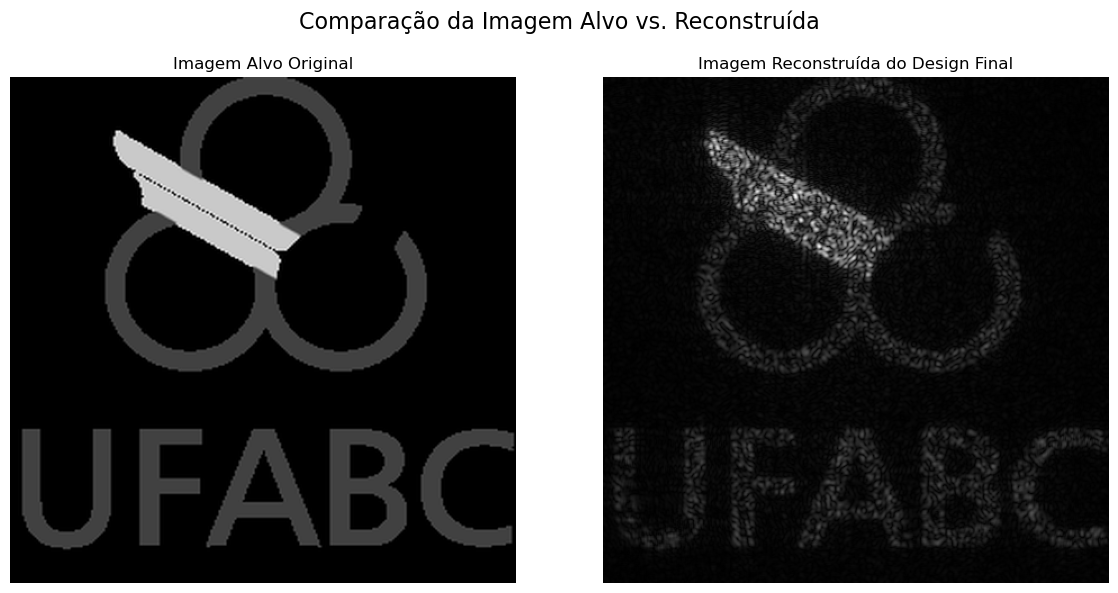


Correlação de Pearson Final: 0.8031


In [26]:


# --- Supondo que essas variáveis já existem no seu código ---
# layout_final_lx: Matriz com as dimensões Lx para cada pixel
# layout_final_ly: Matriz com as dimensões Ly para cada pixel
# df5: Seu DataFrame original com a lookup table
# GSx, target_image, wavelength, z, dx, NA, plt: Outras variáveis e módulos necessários

# ==============================================================================
# 1. Construir o campo complexo E SALVAR OS DADOS DA METASUPERFÍCIE
print("Construindo o campo complexo e mapeando a metassuperfície...")
# Converte a coluna de string para o tipo de dado complexo
df5['S_complex_TM'] = df5['S_complex_TM'].apply(complex)
# Crie um dicionário para busca rápida (lookup)
lookup_table = df5.set_index(['L_x', 'L_y'])['S_complex_TM']

# Inicializa o mapa de fase final
final_phase_map = np.zeros_like(layout_final_lx, dtype=np.complex128)

# Lista para armazenar os dados de cada nanopilar para o CSV
dados_metasuperficie = []

# O laço for que monta a metassuperfície
for i in range(layout_final_lx.shape[0]):
    for j in range(layout_final_lx.shape[1]):
        lx = layout_final_lx[i, j]
        ly = layout_final_ly[i, j]
        
        # Busca o campo complexo na lookup table
        campo_complexo = lookup_table.loc[(lx, ly)]
        
        # Atribui o valor ao mapa final
        final_phase_map[i, j] = campo_complexo
        
        # Adiciona os dados deste pixel (nanopilar) à nossa lista
        dados_metasuperficie.append({
            'pos_i': i,               # Coordenada da linha
            'pos_j': j,               # Coordenada da coluna
            'Lx_nm': lx,              # Dimensão Lx em nanômetros
            'Ly_nm': ly,              # Dimensão Ly em nanômetros
            'fase_rad': np.angle(campo_complexo),    # Fase em radianos
            'amplitude': np.abs(campo_complexo)      # Amplitude (transmitância)
        })

# Converte a lista de dados em um DataFrame do Pandas
df_metasuperficie_final = pd.DataFrame(dados_metasuperficie)

# Salva o DataFrame em um arquivo CSV
caminho_arquivo_csv = 'design_metasuperficie_para_CST.csv'
df_metasuperficie_final.to_csv(caminho_arquivo_csv, index=False)

print(f"\nDados da metassuperfície salvos com sucesso em: '{caminho_arquivo_csv}'")
print("O arquivo contém as coordenadas e dimensões de cada nanopilar.")
print("\nDataFrame gerado:")
print(df_metasuperficie_final.head()) # Mostra as 5 primeiras linhas
# ==============================================================================


# 2. Reconstruir a imagem a partir deste novo mapa de fase
print("\nPropagando o campo para reconstruir a imagem final...")
imagem_reconstruida_final = GSx.reconstruct_image(np.angle(final_phase_map), 
                                                  wavelength, z, dx, NA)

import matplotlib.pyplot as plt
import numpy as np # Adicionado para criar imagens de exemplo

if 'target_image' not in locals():
    print("Criando imagem alvo de exemplo...")
    target_image = np.zeros((100, 100))
    target_image[25:75, 25:75] = 1 # Um quadrado como alvo
if 'final_phase_map' not in locals():
     final_phase_map = np.random.rand(100,100) * 2 * np.pi

# 2. Reconstruir a imagem a partir deste novo mapa de fase
print("\nPropagando o campo para reconstruir a imagem final...")
# No seu código, esta função virá do seu módulo GSx
def reconstruct_image_placeholder(phase_map, *args):
    # Esta é uma simulação simples da reconstrução para o exemplo
    reconstructed = np.abs(np.fft.ifft2(np.exp(1j * phase_map)))
    reconstructed = np.fft.fftshift(reconstructed)
    return reconstructed

if 'GSx' not in locals() or not hasattr(GSx, 'reconstruct_image'):
    print("Usando função de reconstrução de exemplo...")
    imagem_reconstruida_final = reconstruct_image_placeholder(np.angle(final_phase_map))
else:
    imagem_reconstruida_final = GSx.reconstruct_image(np.angle(final_phase_map), 
                                                      wavelength, z, dx, NA)
                                                      
# ==============================================================================
# 3. PLOTAR E COMPARAR AS IMAGENS (A parte que você pediu)
# ==============================================================================
print("Gerando gráfico de comparação...")

plt.figure(figsize=(12, 6))
plt.suptitle("Comparação da Imagem Alvo vs. Reconstruída", fontsize=16)

# Subplot 1: Imagem Alvo Original
plt.subplot(1, 2, 1)
plt.imshow(target_image, cmap='gray')
plt.title("Imagem Alvo Original")
plt.axis('off') # Remove os eixos para uma visualização mais limpa

# Subplot 2: Imagem Reconstruída
plt.subplot(1, 2, 2)
plt.imshow(imagem_reconstruida_final, cmap='gray')
plt.title("Imagem Reconstruída do Design Final")
plt.axis('off') # Remove os eixos

# Ajusta o layout para evitar sobreposição de títulos e mostra o gráfico
plt.tight_layout(rect=[0, 0, 1, 0.96]) # Ajusta para o suptitle
plt.savefig("reconstrucao_final.png") # Salva a figura em um arquivo
plt.show()

# Opcional: Calcular a correlação (Figure of Merit - FoM)
if 'GSx' in locals() and hasattr(GSx, 'calculate_correlation'):
    final_correlation = GSx.calculate_correlation(target_image, imagem_reconstruida_final)
    print(f"\nCorrelação de Pearson Final: {final_correlation:.4f}")

In [27]:
import numpy as np
import pandas as pd
from scipy.spatial import KDTree
import matplotlib.pyplot as plt

# --- Supondo que suas variáveis iniciais já existem ---
# df5, layout_final_lx, layout_final_ly, etc.

# ==============================================================================
# 1. PREPARAR A BIBLIOTECA E MONTAR A METASUPERFÍCIE
# ==============================================================================

print("Preparando a biblioteca de nanopilares para busca otimizada...")
# Extrai as coordenadas (Lx, Ly) da sua biblioteca
biblioteca_pontos = df5[['L_x', 'L_y']].values
# Cria a árvore de busca para encontrar pontos próximos de forma eficiente
kdtree = KDTree(biblioteca_pontos)

# Mantém o df5 com índice para pegar os valores complexos depois
df5_indexed = df5.set_index(['L_x', 'L_y'])

# Inicializa o mapa de fase final
final_phase_map = np.zeros_like(layout_final_lx, dtype=np.complex128)

# >>> INÍCIO DA PARTE DE SALVAR O CSV <<<
# Lista para armazenar os dados de cada nanopilar
dados_metasuperficie = []
print("Construindo o campo complexo e mapeando a metassuperfície para o CSV...")

for i in range(layout_final_lx.shape[0]):
    for j in range(layout_final_lx.shape[1]):
        # Ponto (geometria) desejado pelo algoritmo de otimização
        lx_desejado = layout_final_lx[i, j]
        ly_desejado = layout_final_ly[i, j]
        ponto_desejado = (lx_desejado, ly_desejado)

        # Busca na KDTree pelo ponto mais próximo que existe na sua biblioteca
        distancia, indice_proximo = kdtree.query(ponto_desejado)
        
        # Pega as dimensões (Lx, Ly) do ponto real encontrado
        lx_real = biblioteca_pontos[indice_proximo][0]
        ly_real = biblioteca_pontos[indice_proximo][1]
        
        # Usa essas dimensões reais para buscar o campo complexo
        campo_complexo = df5_indexed.loc[(lx_real, ly_real)]['S_complex_TM']
        final_phase_map[i, j] = campo_complexo
        
        # Adiciona todas as informações à nossa lista para o CSV
        dados_metasuperficie.append({
            'pos_i': i,
            'pos_j': j,
            'Lx_desejado_nm': lx_desejado, # O que o algoritmo queria
            'Ly_desejado_nm': ly_desejado, # O que o algoritmo queria
            'Lx_real_nm': lx_real,         # O que foi usado da biblioteca
            'Ly_real_nm': ly_real,         # O que foi usado da biblioteca
            'fase_rad': np.angle(campo_complexo),
            'amplitude': np.abs(campo_complexo)
        })

# >>> FIM DA PARTE DE SALVAR O CSV <<<

# Converte a lista de dados em um DataFrame
df_metasuperficie_final = pd.DataFrame(dados_metasuperficie)

# Salva o DataFrame em um arquivo CSV
caminho_arquivo_csv = 'design_metasuperficie_com_kdtree.csv'
df_metasuperficie_final.to_csv(caminho_arquivo_csv, index=False)

print(f"\nDados da metassuperfície salvos com sucesso em: '{caminho_arquivo_csv}'")
print("\nDataFrame gerado:")
print(df_metasuperficie_final.head()) # Mostra as 5 primeiras linhas do arquivo


# ==============================================================================
# 2. RECONSTRUÇÃO E PLOTAGEM (continua igual)
# ==============================================================================

# ... (seu código para reconstruir a imagem com GSx.reconstruct_image) ...
# ... (seu código para plotar as imagens lado a lado) ...

Preparando a biblioteca de nanopilares para busca otimizada...
Construindo o campo complexo e mapeando a metassuperfície para o CSV...

Dados da metassuperfície salvos com sucesso em: 'design_metasuperficie_com_kdtree.csv'

DataFrame gerado:
   pos_i  pos_j  Lx_desejado_nm  Ly_desejado_nm  Lx_real_nm  Ly_real_nm  \
0      0      0             145             100         145         100   
1      0      1             170              70         170          70   
2      0      2             130             105         130         105   
3      0      3             120             105         120         105   
4      0      4             125              85         125          85   

   fase_rad  amplitude  
0  0.918672   0.980559  
1  1.536964   0.955150  
2  1.970898   0.962530  
3  2.881670   0.946326  
4 -2.992262   0.955253  
